# 📊 Personal Finance Data Analysis Tutorial
## Learning Pandas & Matplotlib Through Real Financial Data

**Objective**: Learn data analysis fundamentals by analyzing personal financial transactions

**Dataset**: `personal_finance_dataset.csv` - Contains 200+ financial transactions from Jan-July 2025

**Learning Goals**:
- Master Pandas data manipulation
- Create meaningful visualizations with Matplotlib
- Derive actionable financial insights
- Apply data science workflow to real-world problem

## 🔧 Step 1: Environment Setup & Data Loading

**Operations to perform:**
1. Import necessary libraries (pandas, matplotlib, numpy, seaborn)
2. Set up matplotlib for inline plotting
3. Configure pandas display options for better output
4. Load the CSV file using `pd.read_csv()`
5. Display basic information about the dataset structure

In [19]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set matplotlib for notebook display
%matplotlib inline

# Load the personal finance dataset
data = pd.read_csv('personal_finance_dataset.csv')
# Display first few rows to understand structure
data.head()

,Date,Category,Description,Amount,Type
0,4/14/2025,Grocery,Grocery related transaction,-13397.04,Expense
1,6/15/2025,Dividends,Dividends related transaction,60037.76,Income
2,2/23/2025,Utilities,Utilities related transaction,-4374.19,Expense
3,2/23/2025,Dining,Dining related transaction,-1159.21,Expense
4,2/19/2025,Utilities,Utilities related transaction,-7084.92,Expense


## 🔍 Step 2: Initial Data Exploration

**Operations to perform:**
1. Check dataset shape (number of rows and columns)
2. Display column names and data types using `.info()`
3. Check for missing values using `.isnull().sum()`
4. Display first 10 and last 5 rows
5. Get basic statistical summary using `.describe()`
6. Check unique values in categorical columns (Category, Type)
7. Identify data quality issues (if any)

In [ ]:
# Check dataset dimensions
print(f"Dataset dimensions: {data.shape}")
print(f"Number of dimensions: {data.ndim}")
# Display data types and null values
print(f"Data types:\n{data.dtypes}")
print(f"Null values:\n{data.isnull().sum()}")
# Show first and last few rows
print("First 10 rows:")
print(data.head(10))
print("Last 10 rows:")
print(data.tail(10))
# Generate statistical summary
print("Statistical summary:")
print(data.describe())
# Explore categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n{data[col].value_counts()}\n")
# Check for duplicate transactions
duplicate_transactions = data[data.duplicated()]
print(f"Duplicate transactions found:\n{duplicate_transactions}")

## 🧹 Step 3: Data Cleaning & Preprocessing

**Operations to perform:**
1. Convert 'Date' column to datetime format using `pd.to_datetime()`
2. Check if Amount column is numeric, convert if needed
3. Create absolute amount column for calculations
4. Extract additional date components (month, day of week, quarter)
5. Clean any inconsistent category names (if found)
6. Create a month-year column for time series analysis
7. Sort data by date chronologically

In [20]:
# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
# Handle missing dates using forward fill
data['Date'] = data['Date'].ffill()
# Ensure Amount is numeric
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
# Create absolute amount column
data['Absolute_Amount'] = data['Amount'].abs()
# Extract month, day_of_week, quarter
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Quarter'] = data['Date'].dt.quarter
# Create month-year column
data['Month_Year'] = data['Date'].dt.to_period('M')
# Sort by date
data.sort_values('Date', inplace=True)
# Verify data types after cleaning
print(f"Data types after cleaning:\n{data.dtypes}")

Data types after cleaning:
Date               datetime64[ns]
Category                   object
Description                object
Amount                    float64
Type                       object
Absolute_Amount           float64
Month                       int32
Day_of_Week                 int32
Quarter                     int32
Month_Year              period[M]
dtype: object


C:\Users\ffarh\AppData\Local\Temp\ipykernel_19428\2070018817.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Date'].fillna(method='ffill', inplace=True)
C:\Users\ffarh\AppData\Local\Temp\ipykernel_19428\2070018817.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Date'].fillna(method='ffill', inplace=True)


## 📊 Step 4: Basic Financial Analysis

**Operations to perform:**
1. Separate Income and Expense transactions
2. Calculate total income and total expenses
3. Calculate net savings (income - expenses)
4. Calculate average transaction amount by type
5. Find largest income and expense transactions
6. Calculate transaction count by type
7. Create summary statistics table

In [21]:
# Separate income and expense data using the Type column
income_data = data[data['Type'] == 'Income'].copy()
expense_data = data[data['Type'] == 'Expense'].copy()
# Calculate total income and expenses
total_income = income_data['Amount'].sum()
total_expenses = abs(expense_data['Amount'].sum())  # Make expenses positive for easier reading
# Calculate net savings
net_savings = total_income - total_expenses
# Find largest transactions
largest_income = income_data['Amount'].max() if not income_data.empty else 0
largest_expense = abs(expense_data['Amount'].min()) if not expense_data.empty else 0
# Count transactions by type
income_count = len(income_data)
expense_count = len(expense_data)
# Create financial summary table
summary_df = pd.DataFrame({
    'Metric': ['Total Income', 'Total Expenses', 'Net Savings', 'Income Transactions', 'Expense Transactions', 'Largest Income', 'Largest Expense'],
    'Value': [total_income, total_expenses, net_savings, income_count, expense_count, largest_income, largest_expense]
})
print("Financial Summary:")
print(summary_df)

Financial Summary:
                 Metric       Value
0          Total Income  2475003.42
1        Total Expenses   985116.20
2           Net Savings  1489887.22
3   Income Transactions       62.00
4  Expense Transactions      138.00
5        Largest Income    69122.44
6       Largest Expense    14836.85


## 📈 Step 5: Category-wise Expense Analysis

**Operations to perform:**
1. Group expenses by category using `.groupby()`
2. Calculate total spending per category
3. Calculate average spending per category
4. Find category with highest total spending
5. Calculate percentage of total expenses by category
6. Count number of transactions per category
7. Create a category summary DataFrame

In [22]:
# Group expenses by category
category_expenses = expense_data.groupby('Category')['Absolute_Amount'].agg(['sum', 'mean', 'count']).reset_index()
category_expenses.columns = ['Category', 'Total_Amount', 'Average_Amount', 'Transaction_Count']
# Sort categories by total expense
category_expenses = category_expenses.sort_values('Total_Amount', ascending=False)
# Calculate percentage breakdown
category_expenses['Percentage'] = (category_expenses['Total_Amount'] / total_expenses * 100).round(2)
# Display results
print("Category-wise Expense Analysis:")
print(category_expenses)
# Find top spending category
top_category = category_expenses.iloc[0]['Category']
print(f"\nHighest spending category: {top_category}")

Category-wise Expense Analysis:
        Category  Total_Amount  Average_Amount  Transaction_Count  Percentage
3        Grocery     175304.97     7621.955217                 23       17.80
6           Rent     119868.07     9220.620769                 13       12.17
2           Fuel     109486.75     9123.895833                 12       11.11
9      Utilities      97416.44     6958.317143                 14        9.89
1  Entertainment      92948.85     7149.911538                 13        9.44
7       Shopping      91941.47    10215.718889                  9        9.33
8         Travel      87623.54     6258.824286                 14        8.89
4     Healthcare      75327.84     7532.784000                 10        7.65
5     Investment      73657.88     5665.990769                 13        7.48
0         Dining      61540.39     3620.022941                 17        6.25

Highest spending category: Grocery


## 📈 Step 6: Income Source Analysis

**Operations to perform:**
1. Group income by category (Salary, Dividends, Rental Income, etc.)
2. Calculate total income per source
3. Calculate percentage contribution of each income source
4. Find most reliable income source (highest frequency)
5. Calculate average income per transaction by source
6. Compare income stability across sources

In [12]:
# Group income by source (using Category column)
income_sources = income_data.groupby('Category')['Amount'].agg(['sum', 'mean', 'count']).reset_index()
income_sources.columns = ['Source', 'Total_Amount', 'Average_Amount', 'Transaction_Count']
# Calculate total income per source
total_income_all_sources = income_sources['Total_Amount'].sum()
# Calculate percentage contribution
income_sources['Percentage'] = (income_sources['Total_Amount'] / total_income_all_sources * 100).round(2)
# Analyze income frequency and stability    
income_sources['Stability'] = income_data.groupby('Category')['Amount'].std().fillna(0).values
# Sort by total amount
income_sources = income_sources.sort_values('Total_Amount', ascending=False)
# Find most reliable income source (highest frequency)
most_reliable_source = income_sources.loc[income_sources['Transaction_Count'].idxmax(), 'Source']
print(f"Most reliable income source: {most_reliable_source}")
print("\nIncome Source Analysis:")
print(income_sources)

Most reliable income source: Dividends

Income Source Analysis:
          Source  Total_Amount  Average_Amount  Transaction_Count  Percentage  \
4         Salary     604390.81    50365.900833                 12       24.42   
0      Dividends     564456.97    37630.464667                 15       22.81   
1    Freelancing     543450.74    38817.910000                 14       21.96   
3  Rental Income     480585.48    40048.790000                 12       19.42   
2           Gift     282119.42    31346.602222                  9       11.40   

      Stability  
4  17355.837513  
0  18664.117308  
1  18413.213195  
3  17861.839886  
2  24433.206233  


## 📅 Step 7: Time-based Analysis

**Operations to perform:**
1. Group transactions by month using the month column
2. Calculate monthly income, expenses, and net savings
3. Identify best and worst financial months
4. Calculate running totals for cumulative analysis
5. Analyze day-of-week spending patterns
6. Calculate quarterly financial performance
7. Identify spending trends over time

In [ ]:
# Group by month for monthly analysis
monthly_summary = data.groupby('Month_Year').agg({
    'Amount': ['sum', 'count']
}).reset_index()
monthly_summary.columns = ['Month_Year', 'Total_Amount', 'Transaction_Count']

# Calculate monthly income and expenses separately
monthly_income = income_data.groupby('Month_Year')['Amount'].sum().reset_index()
monthly_income.columns = ['Month_Year', 'Monthly_Income']
monthly_expenses = expense_data.groupby('Month_Year')['Absolute_Amount'].sum().reset_index() 
monthly_expenses.columns = ['Month_Year', 'Monthly_Expenses']

# Merge monthly data
monthly_summary = monthly_summary.merge(monthly_income, on='Month_Year', how='left')
monthly_summary = monthly_summary.merge(monthly_expenses, on='Month_Year', how='left')
monthly_summary = monthly_summary.fillna(0)

# Calculate net savings per month
monthly_summary['Net_Savings'] = monthly_summary['Monthly_Income'] - monthly_summary['Monthly_Expenses']

# Calculate cumulative savings
monthly_summary['Cumulative_Savings'] = monthly_summary['Net_Savings'].cumsum()

# Analyze day-of-week patterns
data['Day_of_Week'] = data['Date'].dt.day_name()
dow_analysis = data.groupby('Day_of_Week')['Absolute_Amount'].agg(['sum', 'mean', 'count']).reset_index()

# Quarterly performance analysis
quarterly_summary = data.groupby('Quarter').agg({
    'Amount': ['sum', 'count'],
    'Absolute_Amount': ['mean']
}).reset_index()
quarterly_summary.columns = ['Quarter', 'Total_Amount', 'Transaction_Count', 'Avg_Amount']

# Display results
print("Monthly Financial Summary:")
print(monthly_summary)
print("\nDay-of-Week Analysis:")
print(dow_analysis)
print("\nQuarterly Summary:")
print(quarterly_summary)

## 📊 Step 8: Data Visualization - Distribution Plots

**Operations to perform:**
1. Create histogram of transaction amounts using `plt.hist()`
2. Create separate histograms for income and expenses
3. Create box plots to identify outliers in spending
4. Plot distribution of amounts by transaction type
5. Add proper labels, titles, and formatting
6. Use different colors for income vs expenses

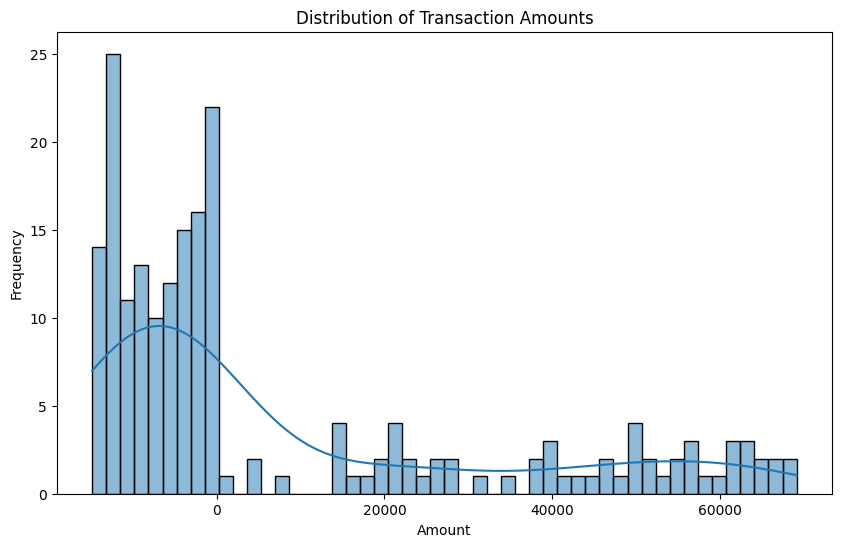

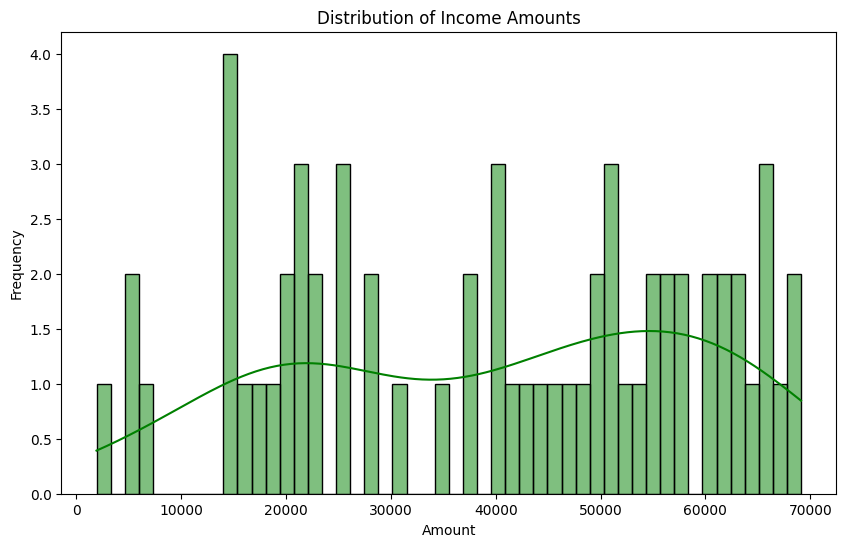

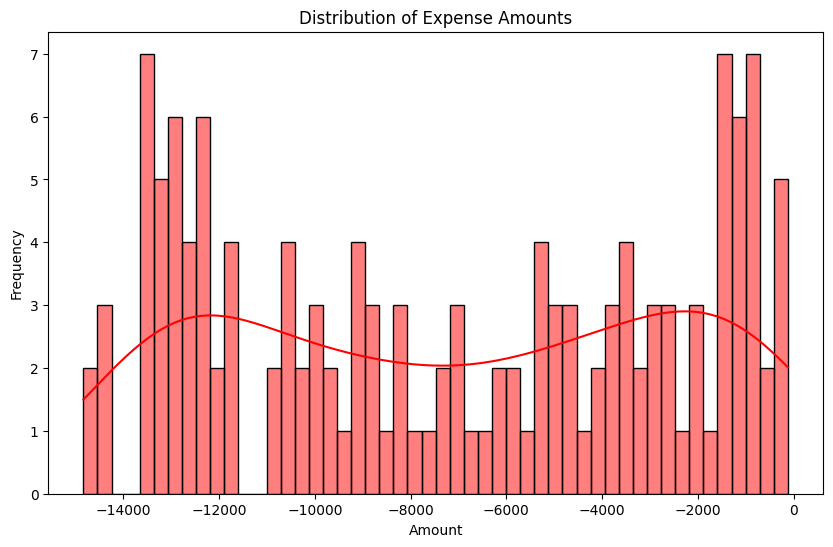

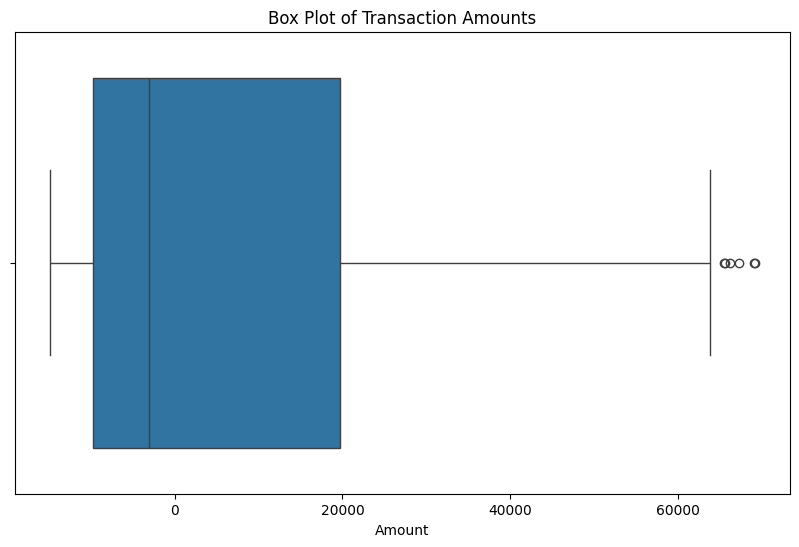

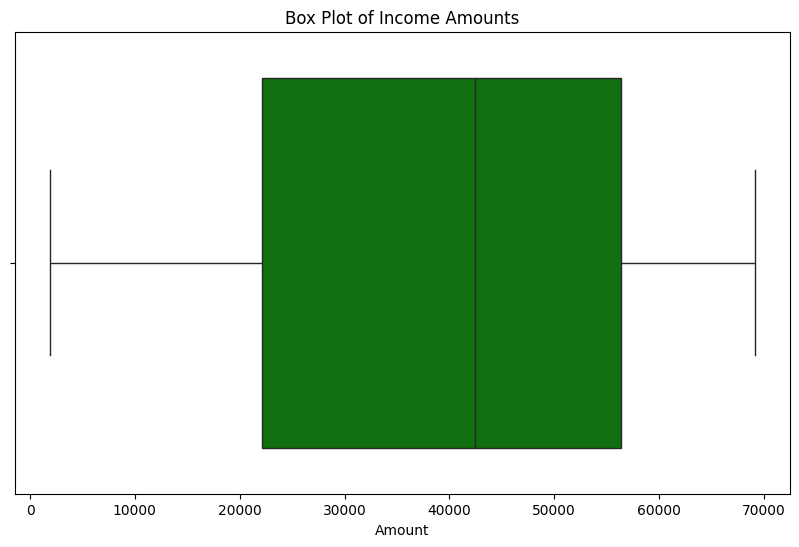

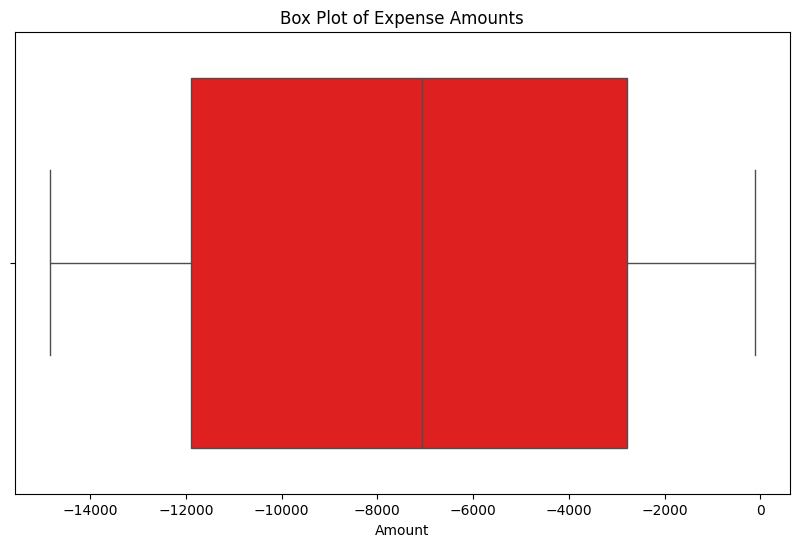

In [24]:
# Create histogram of all transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
# Create separate histograms for income and expenses
plt.figure(figsize=(10,6))
sns.histplot(income_data['Amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Income Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(expense_data['Amount'], bins=50, kde=True, color='red')
plt.title('Distribution of Expense Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Create box plots for outlier detection
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

# Add proper formatting and labels
plt.figure(figsize=(10,6))
sns.boxplot(x=income_data['Amount'], color='green') 
plt.title('Box Plot of Income Amounts')
plt.xlabel('Amount')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x=expense_data['Amount'], color='red')
plt.title('Box Plot of Expense Amounts')
plt.xlabel('Amount')
plt.show()  

## 🥧 Step 9: Category-wise Visualizations

**Operations to perform:**
1. Create pie chart for expense categories using `plt.pie()`
2. Create bar chart for total spending by category
3. Create horizontal bar chart for income sources
4. Add percentage labels to pie chart
5. Sort categories by amount for better visualization
6. Use appropriate color schemes for readability

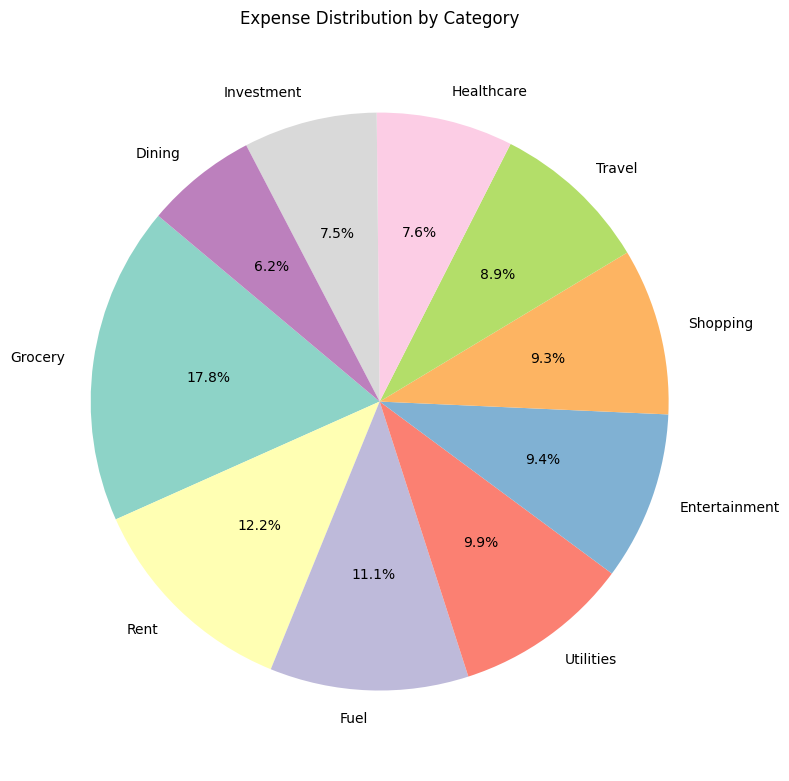

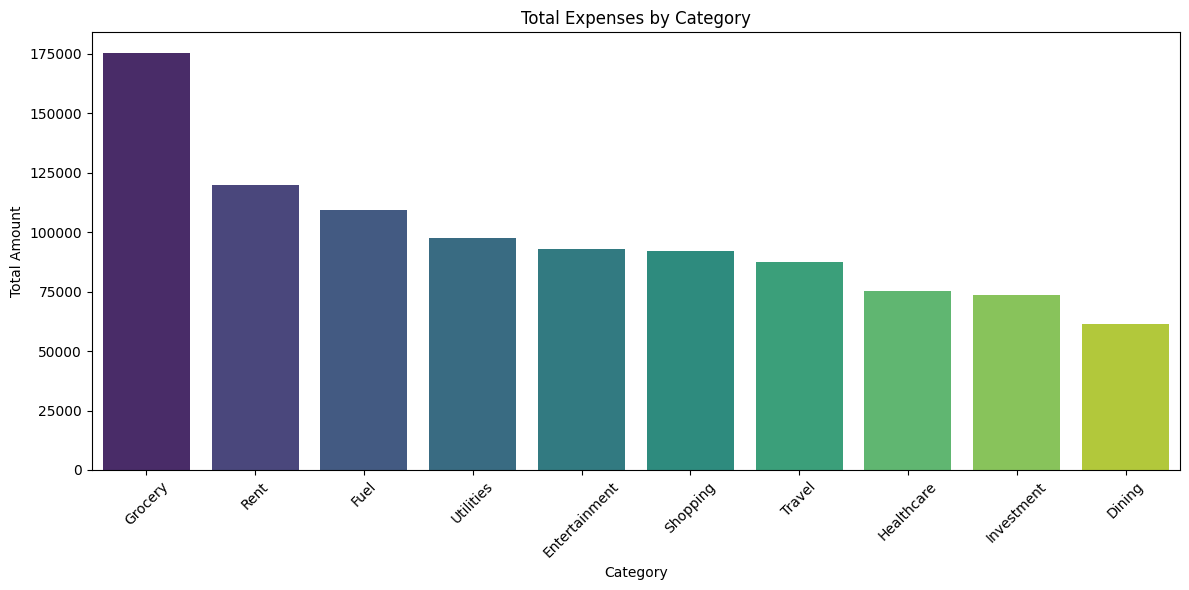

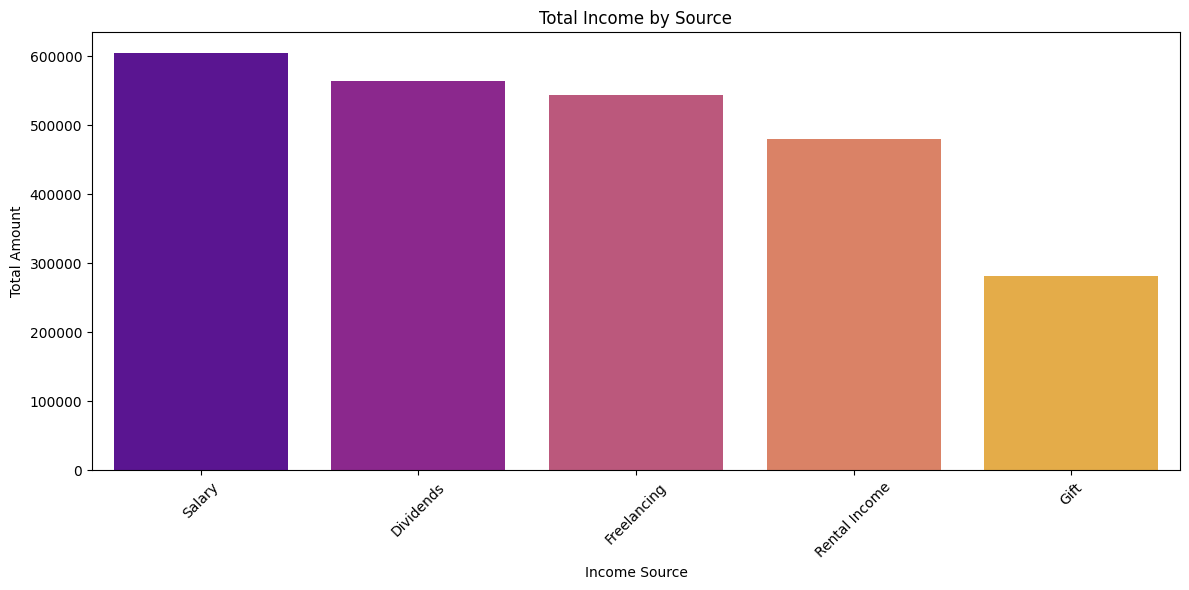

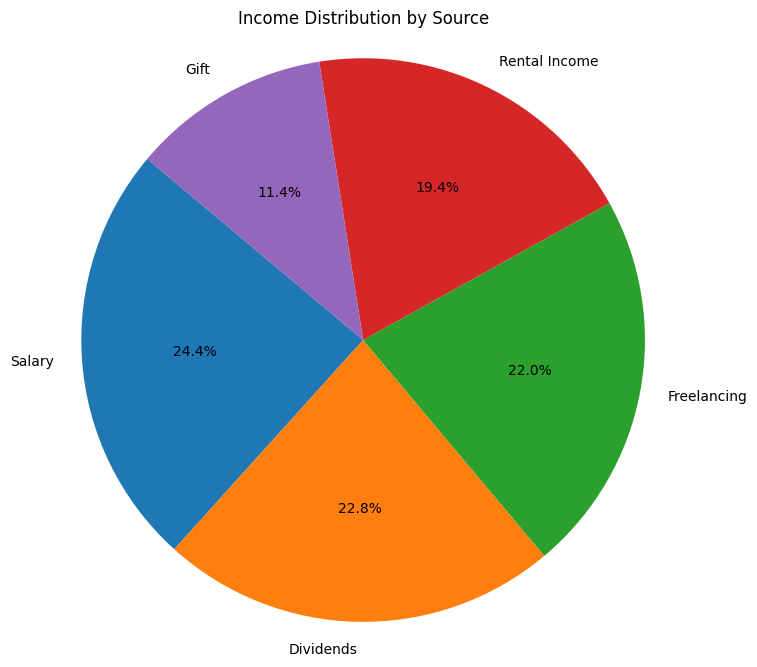

In [25]:
# Create pie chart for expense categories
plt.figure(figsize=(8,8))
# Filter out zero values and ensure we have valid data
valid_expenses = category_expenses[category_expenses['Total_Amount'] > 0]
if not valid_expenses.empty:
    plt.pie(valid_expenses['Total_Amount'], 
            labels=valid_expenses['Category'], 
            autopct='%1.1f%%', 
            startangle=140,
            colors=plt.cm.Set3.colors)
    plt.title('Expense Distribution by Category')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("No valid expense data to display in pie chart")
# Create bar charts for category analysis   
plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Total_Amount', data=category_expenses, hue='Category', palette='viridis', legend=False)
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create income source visualization
plt.figure(figsize=(12,6))
sns.barplot(x='Source', y='Total_Amount', data=income_sources, hue='Source', palette='plasma', legend=False)
plt.title('Total Income by Source')
plt.xlabel('Income Source')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create pie chart for income sources
plt.figure(figsize=(8,8))
plt.pie(income_sources['Total_Amount'], labels=income_sources['Source'], autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution by Source')
plt.axis('equal')
plt.show()      

## 📈 Step 10: Time Series Visualizations

**Operations to perform:**
1. Create line plot for monthly income trend using `plt.plot()`
2. Create line plot for monthly expense trend
3. Create combined plot showing income vs expenses over time
4. Plot cumulative savings over time
5. Create area chart for monthly net savings
6. Add trend lines and proper legends

In [17]:
# Create monthly income trend line
plt.figure(figsize=(12,6))
plt.plot(monthly_summary['Month_Year'].astype(str), monthly_summary['Monthly_Income'], marker='o', color='green', linewidth=2, label='Monthly Income')
plt.title('Monthly Income Trend')
plt.xlabel('Month')
plt.ylabel('Income Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Create monthly expense trend line
plt.figure(figsize=(12,6))
plt.plot(monthly_summary['Month_Year'].astype(str), monthly_summary['Monthly_Expenses'], marker='o', color='red', linewidth=2, label='Monthly Expenses')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Expense Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Create combined income vs expense plot
plt.figure(figsize=(14,8))
plt.plot(monthly_summary['Month_Year'].astype(str), monthly_summary['Monthly_Income'], marker='o', color='green', linewidth=2, label='Income')
plt.plot(monthly_summary['Month_Year'].astype(str), monthly_summary['Monthly_Expenses'], marker='s', color='red', linewidth=2, label='Expenses')
plt.title('Monthly Income vs Expenses Comparison')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot cumulative savings over time
plt.figure(figsize=(12,6))
plt.plot(monthly_summary['Month_Year'].astype(str), monthly_summary['Cumulative_Savings'], marker='o', color='blue', linewidth=2, label='Cumulative Savings')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Cumulative Savings Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Savings')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Create area chart for monthly net savings
plt.figure(figsize=(12,6))
plt.fill_between(monthly_summary['Month_Year'].astype(str), monthly_summary['Net_Savings'], alpha=0.6, color='purple')
plt.plot(monthly_summary['Month_Year'].astype(str), monthly_summary['Net_Savings'], marker='o', color='darkpurple', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Monthly Net Savings')
plt.xlabel('Month')
plt.ylabel('Net Savings')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'monthly_summary' is not defined

<Figure size 1200x600 with 0 Axes>

## 🔍 Step 11: Advanced Analysis & Insights

**Operations to perform:**
1. Calculate expense-to-income ratio by month
2. Identify spending patterns and anomalies
3. Calculate category growth rates over time
4. Find correlation between different expense categories
5. Calculate savings rate percentage
6. Identify seasonal spending patterns
7. Create investment vs consumption analysis

In [ ]:
# Calculate financial ratios
# Identify spending anomalies
# Analyze category correlations
# Calculate savings rates
# Identify patterns and trends

## 📊 Step 12: Dashboard Creation

**Operations to perform:**
1. Create subplot layout using `plt.subplots()`
2. Combine key visualizations in one dashboard
3. Include: monthly trends, category breakdown, income sources
4. Add overall title and adjust spacing
5. Use consistent color scheme across plots
6. Add key metrics as text annotations

In [ ]:
# Create subplot layout
# Add key visualizations to dashboard
# Format for professional presentation
# Add summary statistics

## 💡 Step 13: Financial Insights & Recommendations

**Operations to perform:**
1. Summarize key findings from the analysis
2. Identify top spending categories that need attention
3. Analyze income stability and diversification
4. Calculate emergency fund adequacy
5. Identify opportunities for cost optimization
6. Suggest budgeting improvements
7. Create actionable financial recommendations

## 📝 Step 14: Export Results & Reports

**Operations to perform:**
1. Save processed data to new CSV file
2. Export summary statistics to Excel
3. Save key visualizations as PNG files
4. Create a summary report in text format
5. Export category analysis as separate file
6. Save monthly trends data for future reference

In [ ]:
# Save processed data
# Export analysis results
# Save visualizations
# Create summary reports

## 🎯 Learning Objectives Achieved

By completing this tutorial, students will have learned:

### Pandas Skills:
- Data loading and exploration
- Data cleaning and preprocessing
- Grouping and aggregation operations
- Date/time manipulation
- Filtering and conditional selection
- Statistical calculations

### Matplotlib Skills:
- Basic plotting (line, bar, pie, histogram)
- Customization (colors, labels, titles)
- Subplot creation and layout
- Time series visualization
- Dashboard creation

### Data Science Workflow:
- Problem definition
- Data exploration and cleaning
- Analysis and visualization
- Insight generation
- Communication of results

### Real-world Application:
- Financial data analysis
- Pattern recognition
- Decision making with data
- Report creation and presentation

## 📚 Next Steps for Advanced Learning

After mastering this tutorial, students can explore:
1. **Interactive visualizations** with Plotly
2. **Statistical analysis** with scipy
3. **Machine learning** for expense prediction
4. **Web dashboards** with Streamlit or Dash
5. **Database integration** with SQL
6. **Automated reporting** with scheduled scripts

---

**Happy Learning! 📊✨**